In [85]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
import numpy as np
import pylab as plt
import glob
import os
import scipy.integrate as inte
import scipy.special as special
import scipy.interpolate as interp
import scipy.signal as sig

In [87]:
import stephane.display.graphes as graphes
import stephane.tools.Smath as smath
#import sympy #symoblic python
import mpmath as math
import cv2
import glob
import csv
import os

In [88]:
base = '/home/turbots/Documents/Codes/Python/Phone_processing/'
savefolder = base + '/Results'
if not os.path.isdir(savefolder):
    os.makedirs(savefolder)

In [89]:
import zipfile
folder = '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703085287/'

filelist = glob.glob(folder+'*.zip')
print(filelist)

data = {}
for filename in filelist:
    with zipfile.ZipFile(filename,"r") as zip_ref:
        foldersave = filename.split('.')[0]
        zip_ref.extractall(foldersave)
    datafile = foldersave+'/Accelerometer.csv'
    d = np.loadtxt(datafile, delimiter=',',skiprows=1)
    data[filename] = d

['/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703085287/test_192_168_0_136.zip', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703085287/test_192_168_0_117.zip', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703085287/test_192_168_0_122.zip', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703085287/test_192_168_0_148.zip', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703085287/test_192_168_0_129.zip', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703085287/test_192_168_0_112.zip']


In [138]:
csv_timelist = glob.glob(folder+'*/*/time.csv')

data = {}
key = 'time'
data[key]={}
for filename in csv_timelist:
    #print(filename)
    rows = []
    num = int(filename.split('_')[-1].split('/')[0])-100
    #print(i,expnum)
    #print(num)
    k = num
    data['time'][k]={}
    with open(filename) as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            rows.append(row)
            #print(', '.join(row))
        data['time'][k]['raw']=rows
#filename = glob.glob(folder+'*.csv')[0]

In [235]:
for phone in phonelist:
    print(data['time'][phone]['raw'])

[['"event"', '"experiment time"', '"system time"', '"system time text"'], ['"START"', '0.000000000E0', '1703085288.539', '"2023-12-20 16:14:48.539 UTC+01:00"'], ['"PAUSE"', '3.045580558E2', '1703085593.097', '"2023-12-20 16:19:53.097 UTC+01:00"']]
[['"event"', '"experiment time"', '"system time"', '"system time text"'], ['"START"', '0.000000000E0', '1703085285.688', '"2023-12-20 16:14:45.688 UTC+01:00"'], ['"PAUSE"', '3.043675209E2', '1703085590.056', '"2023-12-20 16:19:50.056 UTC+01:00"']]
[['"event"', '"experiment time"', '"system time"', '"system time text"'], ['"START"', '0.000000000E0', '1703085290.782', '"2023-12-20 16:14:50.782 UTC+01:00"'], ['"PAUSE"', '3.045035022E2', '1703085595.286', '"2023-12-20 16:19:55.286 UTC+01:00"']]
[['"event"', '"experiment time"', '"system time"', '"system time text"'], ['"START"', '0.000000000E0', '1703085287.854', '"2023-12-20 16:14:47.854 UTC+01:00"'], ['"PAUSE"', '3.046560702E2', '1703085592.510', '"2023-12-20 16:19:52.510 UTC+01:00"']]
[['"even

In [226]:
key = 'xyz'
data[key]={}
keys = ['t','ax','ay','az']
csv_timelist = glob.glob(folder+'*/Accelerometer.csv')

print(csv_timelist)
for filename in csv_timelist:
    rows = []
    num = int(filename.split('_')[-1].split('/')[0])-100
    #print(num)
    data[key][num]={}
    with open(filename) as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for j,row in enumerate(spamreader):
            rows.append(row)
            #print(', '.join(row))
            for l,k in enumerate(keys):
                if j==0:
                    data[key][num][k]=[]
                else:
                    data[key][num][k].append(float(row[l]))

#filename = glob.glob(folder+'*.csv')[0]

['/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703085287/test_192_168_0_129/Accelerometer.csv', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703085287/test_192_168_0_117/Accelerometer.csv', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703085287/test_192_168_0_136/Accelerometer.csv', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703085287/test_192_168_0_148/Accelerometer.csv', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703085287/test_192_168_0_122/Accelerometer.csv', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703085287/test_192_168_0_112/Accelerometer.csv']


In [233]:
for phone in phonelist:
    print(data['xyz'][phone]['t'][0])

0.033699694
0.043446709
0.032454487
0.032728323
0.03362829
0.034502496


In [230]:
key = 'xyz'
#data[key]={}
keys = ['tg','gx','gy','gz']
csv_timelist = glob.glob(folder+'*/Gyroscope.csv')

print(csv_timelist)
for filename in csv_timelist:
    rows = []
    num = int(filename.split('_')[-1].split('/')[0])-100
    print(num)
    #data[key][num]={}
    with open(filename) as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for j,row in enumerate(spamreader):
            rows.append(row)
            #print(', '.join(row))
            for l,k in enumerate(keys):
                if j==0:
                    data[key][num][k]=[]
                else:
                    data[key][num][k].append(float(row[l]))

#filename = glob.glob(folder+'*.csv')[0]

['/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703085287/test_192_168_0_129/Gyroscope.csv', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703085287/test_192_168_0_117/Gyroscope.csv', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703085287/test_192_168_0_136/Gyroscope.csv', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703085287/test_192_168_0_148/Gyroscope.csv', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703085287/test_192_168_0_122/Gyroscope.csv', '/home/turbots/Documents/Codes/Python/pyphone/PhyPhox_1703085287/test_192_168_0_112/Gyroscope.csv']
29
17
36
48
22
12


In [141]:
phonelist = list(data["xyz"].keys())
print(phonelist)

[29, 17, 36, 48, 22, 12]


In [142]:
data['dt_phy']={}
for phone in phonelist:
    data['dt_phy'][phone] = float(data['time'][phone]['raw'][1][2])-float(data['time'][12]['raw'][1][2])
print(data['dt_phy'])

{29: -1.4449999332427979, 17: -4.296000003814697, 36: 0.7980000972747803, 48: -2.129999876022339, 22: -1.7089998722076416, 12: 0.0}


In [94]:
data.keys()

dict_keys(['time', 'xyz', 'dt_phy'])

In [143]:
data['xyz'][22].keys()

dict_keys(['t', 'ax', 'ay', 'az', 'tg', 'gx', 'gy', 'gz'])

In [144]:
timetable = glob.glob(folder+'*.txt')[0]

data['dt_abs']={}
with open(timetable) as txtfile:
    table = txtfile.readlines()
    
for tab in table:
    tab = tab[:-2]
    num,time = tab.split('\t')
    num = int(num)
    time = float(time)
    
    if num in phonelist:
        data['dt_abs'][num]=time
        print(num,time)

29 -2.07821154594421
17 -4.80124473571777
48 -3.386440515518188
22 -2.425540685653686
12 0.3203024864196777
36 0.00735735893249511


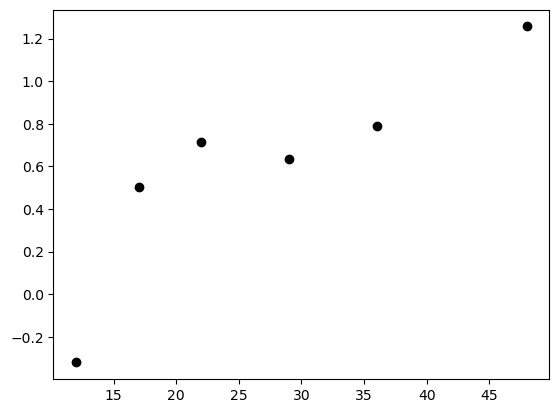

In [318]:
for phone in phonelist:
    dt = -data['dt_abs'][phone]+data['dt_phy'][phone]
    plt.plot(phone,dt,'ko')

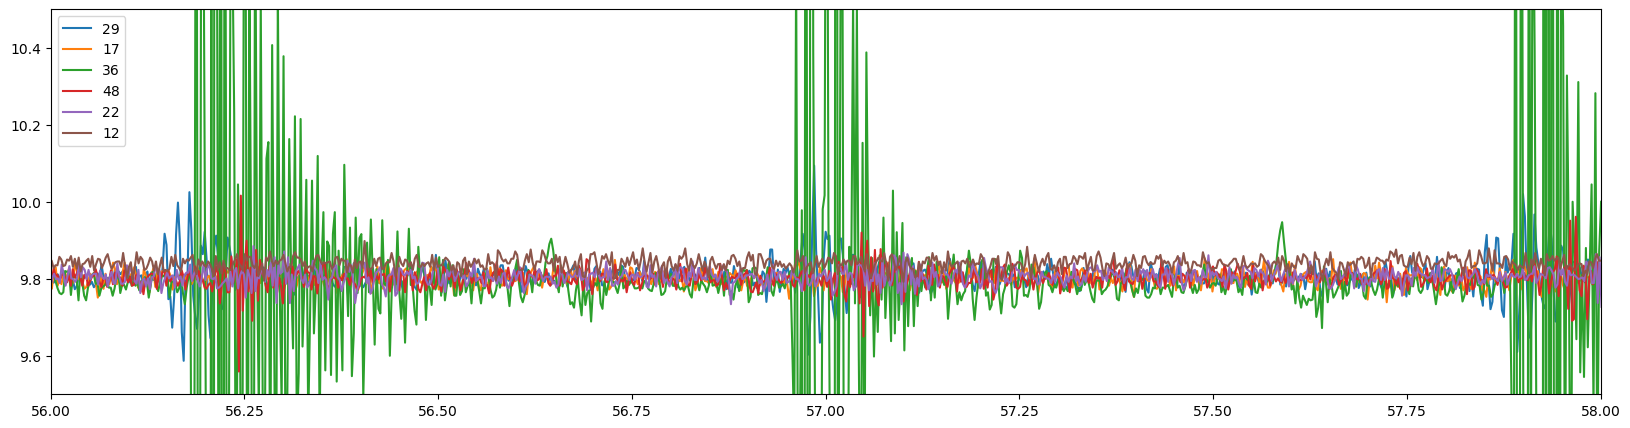

In [323]:
fig,ax = plt.subplots(figsize=(20,5))

for phone in phonelist:
    dt = -data['dt_abs'][phone]+data['dt_phy'][phone]
    t = np.asarray(data["xyz"][phone]['t'])
    ax.plot(t+dt,data["xyz"][phone]['az'],'')

    g = 0
    plt.axis([56,58,9.5-g,10.5-g])
    #plt.axis([66,70,9.5,10.5])
    
plt.legend(phonelist)

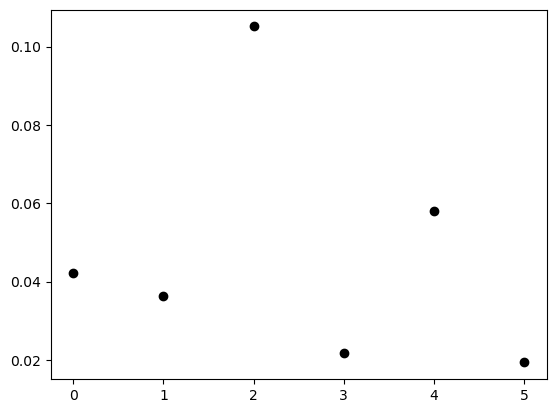

In [324]:
for j,phone in enumerate(phonelist):
    plt.plot(j,np.std(data["xyz"][phone]['az']),'ko')

In [216]:
data['dt_phy']

{29: -1.4449999332427979,
 17: -4.296000003814697,
 36: 0.7980000972747803,
 48: -2.129999876022339,
 22: -1.7089998722076416,
 12: 0.0}

In [214]:
data['dt_abs']

{29: -2.07821154594421,
 17: -4.80124473571777,
 48: -3.386440515518188,
 22: -2.425540685653686,
 12: 0.3203024864196777,
 36: 0.00735735893249511}

0.633211612701412
0.5052447319030726
0.7906427383422852
1.2564406394958492
0.7165408134460445
-0.3203024864196777


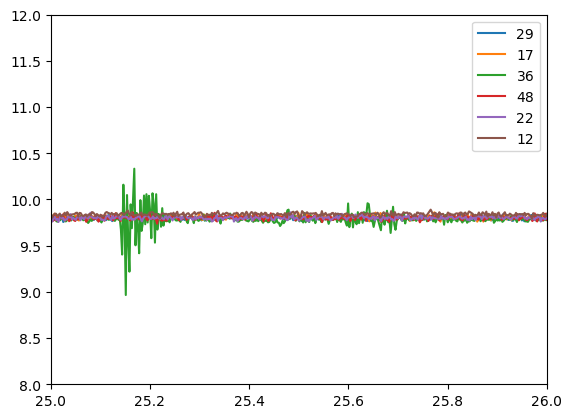

In [325]:
for phone in phonelist:
    dt = -data['dt_abs'][phone]+data['dt_phy'][phone]
    t = np.asarray(data["xyz"][phone]['t'])
    plt.plot(t+dt,data["xyz"][phone]['az'],'')

    print(dt)
    plt.axis([25,26,8,12])
plt.legend(phonelist)

In [81]:
data

dict_keys(['time', 'xyz', 'dt', 'dt_abs', 'dt_phy'])

In [326]:
dt = 0.001

data['tcalib']={}
Tmin,Tmax = [],[]

f = {}
for phone in phonelist:
    dt = -data['dt_abs'][phone]+data['dt_phy'][phone]
    t = np.asarray(data["xyz"][phone]['t'])
    data['tcalib'][phone] = t+dt
    
    tcalib = data['tcalib'][phone]
    print(np.min(tcalib),np.max(tcalib))
    Tmin.append(np.min(tcalib))
    Tmax.append(np.max(tcalib))

tmin = np.max(Tmin)
tmax = np.min(Tmax)

print(tmin,tmax)


0.6669113067014121 305.18539791270143
0.5486914409030726 304.8664059319031
0.8230972253422851 305.2874305383423
1.2891689624958491 305.91056443949583
0.7501691034460445 305.258030413446
-0.2857999904196777 302.83941261358035
1.2891689624958491 302.83941261358035


In [327]:

f = {}
for phone in phonelist:
    f[phone] = interp.interp1d(data['tcalib'][phone],data['xyz'][phone]['az'])

In [341]:

n = len(phonelist)

ti = np.arange(tmin,tmax,0.001)

print(len(ti))
N = len(ti)
Z = np.zeros((n,N))

for j,phone in enumerate(phonelist):
    Z[j,:] = f[phone](ti)

    #fig,ax = plt.subplots(figsize=(15,5))
    #for num in tellist:
    #    ax.plot(ti,Z[i-1,num-1,:])
    #    graphes.legende('Time (s)','Acceleration m/s$^2$','Interpolated time')

301551


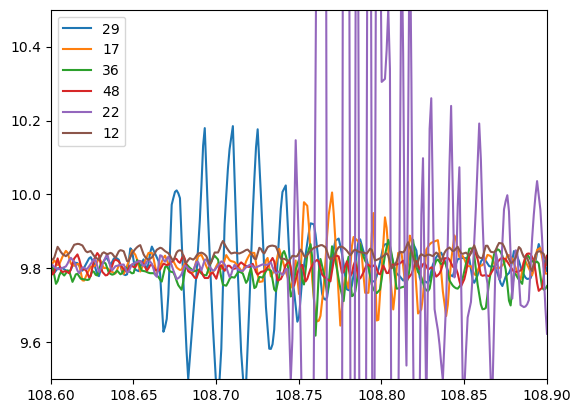

In [358]:
for j in range(n):
    plt.plot(ti,Z[j,:])
    plt.axis([108.6,108.9,9.5,10.5])    
plt.legend(phonelist)

0


KeyboardInterrupt: 

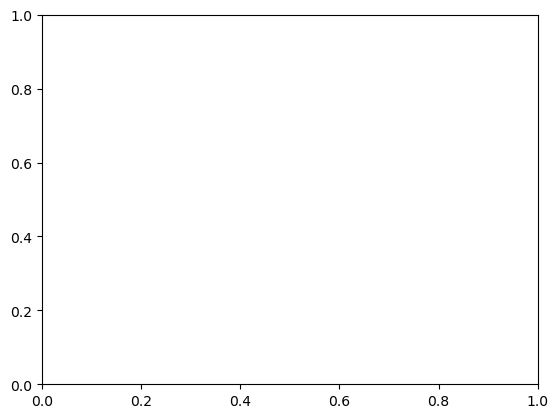

In [340]:
C = np.zeros((n-1,N*2-1))
for i,key in enumerate(phonelist):
    
    
    print(i)
    
    y1 = Z[i,:]
    y2 = Z[i+1,:]
    y1 = y1 - np.mean(y1)
    y2 = y2 - np.mean(y2)

    C[i,:] = sig.correlate(y1,y1,'full')
    
    
    plt.plot(C)
    
#    print(C)
    

0
1
2
3
4


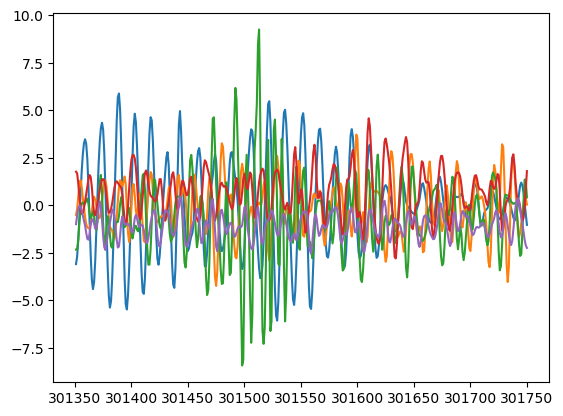

In [351]:
C = np.zeros((n-1,N*2-1))
for i,key in enumerate(phonelist[:-1]):
    
    
    print(i)
    
    y1 = Z[i,:]
    y2 = Z[i+1,:]
    y1 = y1 - np.mean(y1)
    y2 = y2 - np.mean(y2)

    x = np.arange(2*N-1)
    b = 200
    indices = range(N-b,N+b)
    C[i,:] = sig.correlate(y1,y2,'full')
    
    plt.plot(x[indices],C[i,indices])
    
#    print(C)
    

IndexError: index 5 is out of bounds for axis 0 with size 5

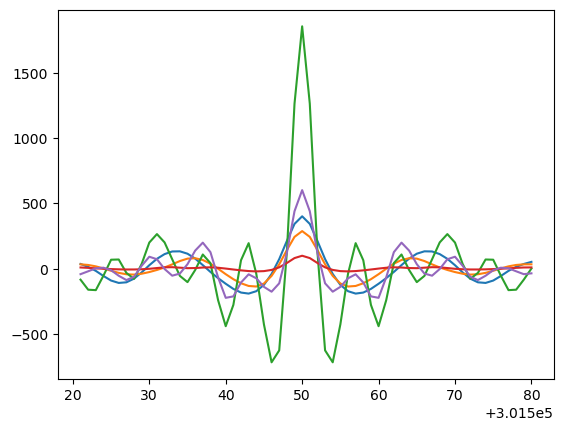

In [349]:
x = np.arange(2*N-1)
b = 30
indices = range(N-b,N+b)
for i,phone in enumerate(phonelist):
    plt.plot(x[indices],C[i,indices])
    
#    print(C)
    

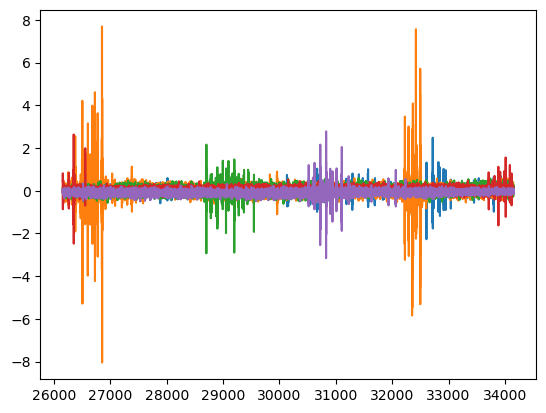

In [333]:
x = np.arange(2*N-1)
for i in range(5):
    b = 4000
    indices = range(N-b,N+b)
#    indices = range(2*N-1)
#    indices = range(N-b,N+b)
    #indices = range(28920,29000)
    
    plt.plot(x[indices],C[i,indices])

In [30]:
import scipy.signal as sig



In [16]:
#get start time, duration of recording
data = {}
data['time']={}

for i in range(1,6):


In [207]:
print(data['time'].keys())
print(data['time'][(1,10)]['raw'][2])

dict_keys([(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 29), (1, 31), (1, 33), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (2, 20), (2, 21), (2, 22), (2, 23), (2, 24), (2, 25), (2, 26), (2, 27), (2, 29), (2, 31), (2, 33), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (3, 20), (3, 21), (3, 22), (3, 23), (3, 24), (3, 25), (3, 26), (3, 27), (3, 29), (3, 31), (3, 33), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (4, 20), (4, 21), (4, 22), (4, 23), (4, 24), (4, 25), (4, 26), (4, 27), (4, 

In [208]:
starts = np.asarray([float(data['time'][k]['raw'][1][2]) for k in data['time'].keys()])
stops = np.asarray([float(data['time'][k]['raw'][2][2]) for k in data['time'].keys()])
print(stops-starts)

[39.95700002 39.68499994 39.68099999 39.30299997 39.18000007 37.96500015
 38.0309999  37.62100005 37.56500006 37.13800001 37.20799994 37.20600009
 37.22600007 36.59799981 36.13199997 36.49600005 36.53299999 36.64700007
 37.0710001  37.55800009 38.39099979 37.65899992 37.36000013 37.43299985
 37.41700006 36.85700011 36.38300014 36.41400003 36.204      42.81500006
 50.22900009 46.93300009 46.13400006 45.602      45.29099989 44.85399985
 44.05299997 44.24300003 43.27600002 43.68599987 43.30800009 43.32700014
 43.27999997 42.88499999 42.91100001 42.4920001  42.08300018 42.875
 42.05699992 42.06799984 42.65199995 42.60000014 42.72300005 42.33999991
 42.33200002 42.66300011 42.47399998 42.08299994 40.5539999  39.22900009
 37.60700011 37.65499997 37.32800007 36.8599999  36.91899991 37.38700008
 37.21000004 36.20799994 36.23199987 36.12600017 36.01399994 35.99000001
 35.52999997 34.68300009 34.62000012 34.76399994 34.12000012 33.67400002
 33.21099997 33.18799996 33.33200002 33.273      33.4079

1
2
3
4
5
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
29
31
33


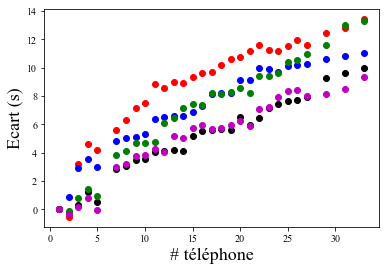

In [209]:
#Dt = starts-starts[0]
colors = ['k' ,'r' ,'b','g','m']
for (i,num) in data['time'].keys():
    k = (i,num)
    if i==1:
        print(num)
    data['time'][k]['dt']= float(data['time'][k]['raw'][1][2])-float(data['time'][(i,1)]['raw'][1][2])
    #print(num,Dt[num-1])
    plt.plot(num,data['time'][k]['dt'],marker='o',color=colors[i-1])
#plt.plot(starts-starts[0])

figs = graphes.legende('# téléphone','Ecart (s)','')
#graphes.save_figs(figs,savedir=savefolder)

In [210]:
# look at correlation along z
#get start time, duration of recording
key = 'xyz'
data[key]={}
keys = ['t','ax','ay','az']

for i in range(1,6):
    folder = '021123/'+str(i)#/media/turbots/DATA/thiou/labshared2/Windveil/NedFacades/recaps/'
    csv_timelist = glob.glob(folder+'/*/Raw data.csv')

    for filename in csv_timelist:
        rows = []
        num = int(filename.split('_')[-1].split('/')[0])-100
        #print(num)
        data[key][(i,num)]={}
        with open(filename) as csvfile:
            spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
            for j,row in enumerate(spamreader):
                rows.append(row)
                #print(', '.join(row))
                for l,k in enumerate(keys):
                    if j==0:
                        data[key][(i,num)][k]=[]
                    else:
                        data[key][(i,num)][k].append(float(row[l]))

#filename = glob.glob(folder+'*.csv')[0]

In [211]:
data['xyz'][(1,1)].keys()

dict_keys(['t', 'ax', 'ay', 'az'])

figure already exists


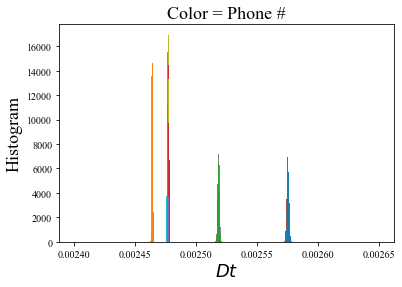

In [212]:
for (i,num) in data[key].keys():
    if num>5 and num<11:
        fig = plt.hist(np.diff(data[key][(i,num)]['t']),np.linspace(0.0024,0.00265,300))
figs = graphes.legende('$Dt$','Histogram','Color = Phone #')
graphes.save_figs(figs,savedir=savefolder)

figure already exists


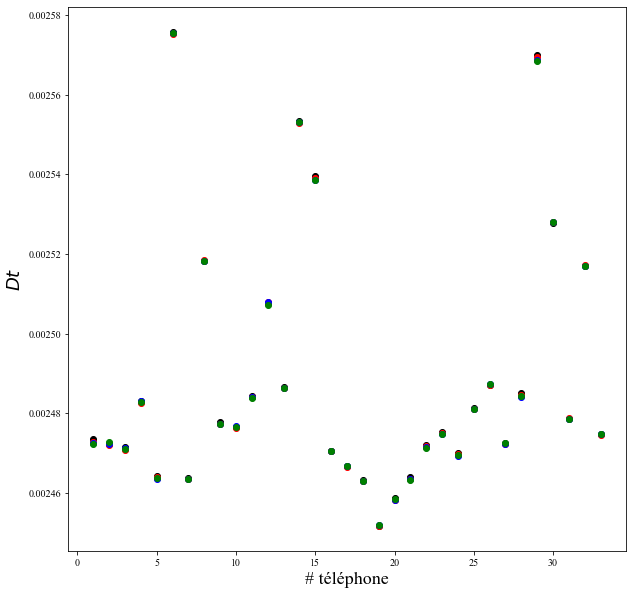

In [213]:
tellist = range(1,34)
fig,ax = plt.subplots(figsize=(10,10))

for i in range(1,5):

    Ft,Ft_std = [],[]
    for num in tellist:
        ft = np.mean(np.diff(data[key][(i,num)]['t']))
        ft_std = np.std(np.diff(data[key][(i,num)]['t']))
        Ft.append(ft)
        Ft_std.append(ft_std)

    plt.errorbar(tellist,Ft,np.asarray(Ft_std)/20,marker='o',color=colors[i-1],ls=' ')
    figs = graphes.legende('# téléphone','$Dt$','')
graphes.save_figs(figs,savedir=savefolder,prefix='Time_Synchronisation')

figure already exists


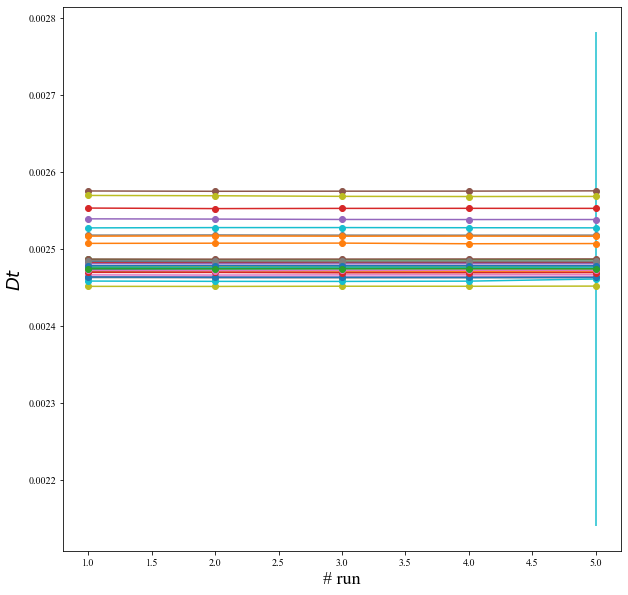

In [214]:
tellist = np.arange(1,34)
fig,ax = plt.subplots(figsize=(10,10))

for num in tellist:
    Ft,Ft_std = [],[]
    for i in range(1,6):
        ft = np.mean(np.diff(data[key][(i,num)]['t']))
        ft_std = np.std(np.diff(data[key][(i,num)]['t']))
        Ft.append(ft)
        Ft_std.append(ft_std)

    plt.errorbar(range(1,6),Ft,np.asarray(Ft_std),marker='o',ls='-')
    figs = graphes.legende('# run','$Dt$','')
graphes.save_figs(figs,savedir=savefolder)

In [215]:
(np.max(Ft)-np.min(Ft))/np.mean(Ft)

9.171829469609643e-05

In [218]:
#type(data[key][k]['t'])

(1, 6)
(1, 28)
(1, 30)
(1, 32)
(2, 6)
(2, 28)
(2, 30)
(2, 32)
(3, 6)
(3, 28)
(3, 30)
(3, 32)
(4, 6)
(4, 28)
(4, 30)
(4, 32)
(5, 6)
(5, 28)
(5, 30)
(5, 32)


In [228]:
len(tellist)

29

In [226]:
ti = {}
N = {}

for i in range(1,6):
    minT = []
    maxT = []
    for num in tellist:  
        k = (i,num)
        if num<250:
            t = np.asarray(data[key][k]['t'])+data['time'][k]['dt']
            minT.append(t[0])
            maxT.append(t[-1])

    mint = np.max(minT)
    maxt = np.min(maxT)

    print(maxt-mint)
    ti[i] = np.arange(mint,maxt,dt/10)
    N[i] = len(ti[i])
    print(N)

29.40673424096167
{1: 118825}
29.363251604127804
{1: 118825, 2: 118649}
29.019385707645384
{1: 118825, 2: 118649, 3: 117260}
29.655880196645384
{1: 118825, 2: 118649, 3: 117260, 4: 119832}
29.47628080835144
{1: 118825, 2: 118649, 3: 117260, 4: 119832, 5: 119106}


In [231]:
Z = {}
n = 33#len(tellist)

for i in range(1,6):
    Z[i] = np.zeros((n,N[i]))

    for j,num in enumerate(tellist):
        Z[i][num-1,:] = f[(i,num)](ti[i])
        Z[i][num-1,:] = Z[i][num-1,:] - np.mean(Z[i][num-1,:])

    #fig,ax = plt.subplots(figsize=(15,5))
    #for num in tellist:
    #    ax.plot(ti,Z[i-1,num-1,:])
    #    graphes.legende('Time (s)','Acceleration m/s$^2$','Interpolated time')

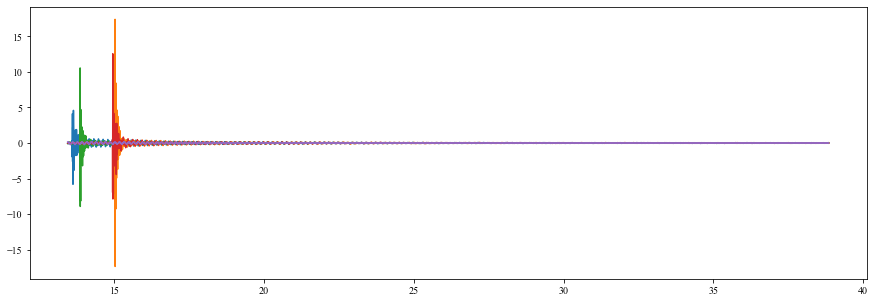

In [171]:
num=1
fig,ax = plt.subplots(figsize=(15,5))

for i in range(5):
    ax.plot(ti,Z[i,num-1,:])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


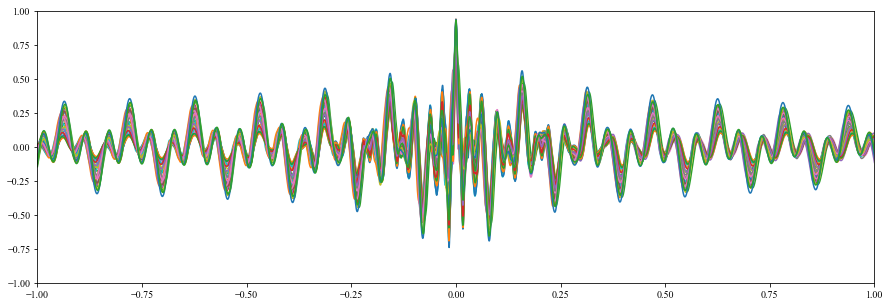

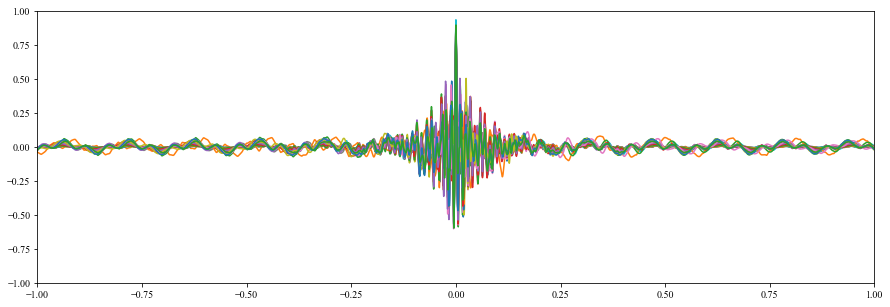

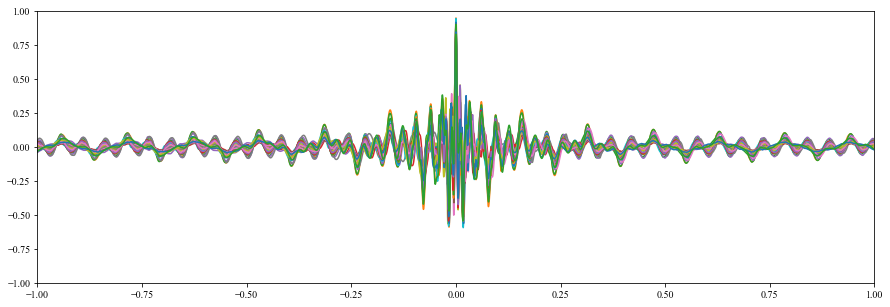

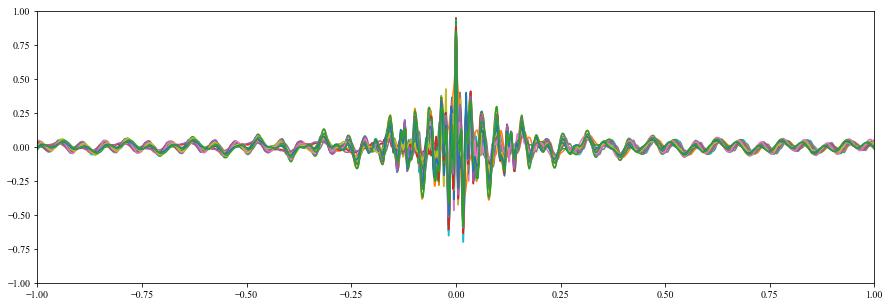

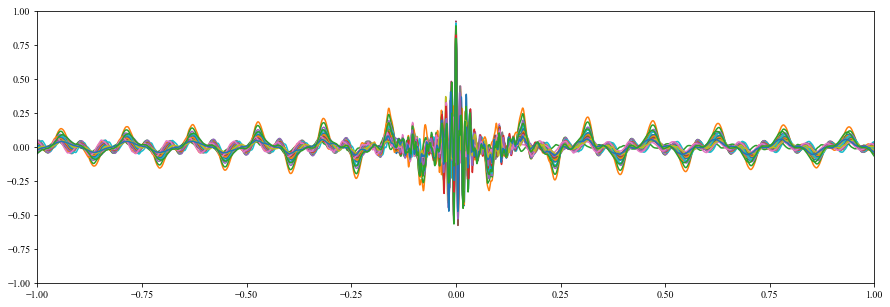

In [235]:
import scipy.signal as sig
tellist = np.arange(1,34)

j=2
Dt2 = np.zeros((5,n))
for i in range(1,6):
    fig,ax = plt.subplots(figsize=(15,5))

    for num in tellist:
        nump = np.mod(num+j-1,n)+1
        #print(num,nump)
        #numm = np.mod(num+j-3,n)+1

        #print(num,num2)

        Cp = np.asarray(sig.correlate(Z[i][num-1,:],Z[i][nump-1,:],mode='same'))
        Norm = np.sqrt(np.sum(Z[i][num-1,:]**2)*np.sum(Z[i][nump-1,:]**2))
        Cp = Cp/Norm

        lag = ti[i]-np.mean(ti[i])
        k = np.argmax(Cp)
        Dt2[i-1,num-1] = lag[k]
#        Dtm[num-1] = lag[k]

        ax.plot(lag-Dt2[i-1,num-1],Cp)
    plt.axis([-1,1,-1,1])

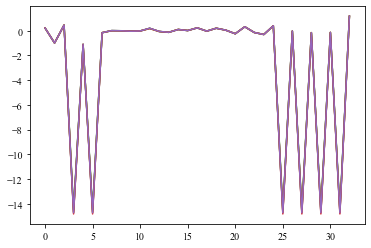

In [236]:
for i in range(1,6):
    plt.plot(Dt2[i-1,:])

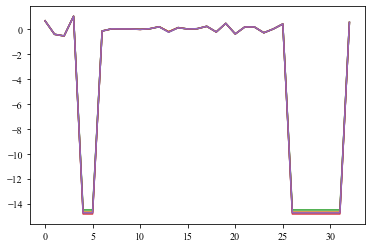

(0.0, 5.0, -20.0, 20.0)

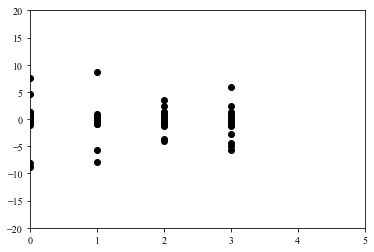

In [205]:
plt.plot(np.diff(Dt2*1000,axis=0),'ko')
plt.axis([0,5,-20,20])

(-1.0, 1.0, -1.0, 1.0)

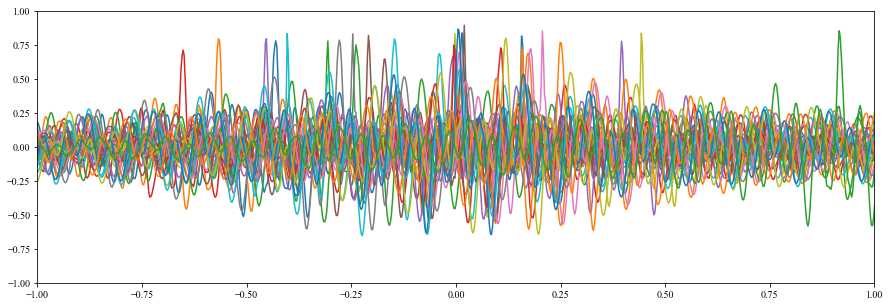

In [128]:
import scipy.signal as sig

fig,ax = plt.subplots(figsize=(15,5))

j=2
n = len(tellist)
#Dt2 = []
for num in tellist:
    num2 = np.mod(num+j-1,n)+1
    #print(num,num2)
    
    C = np.asarray(sig.correlate(Z[num-1,:],Z[num2-1,:],mode='same'))
    Norm = np.sqrt(np.sum(Z[num-1,:]**2)*np.sum(Z[num2-1,:]**2))
    lag = ti-np.mean(ti)
    k = np.argmax(C)
    #Dt2.append(lag[k])
    ax.plot(lag-Dt2[num-1],C/Norm)
    
plt.axis([-1,1,-1,1])

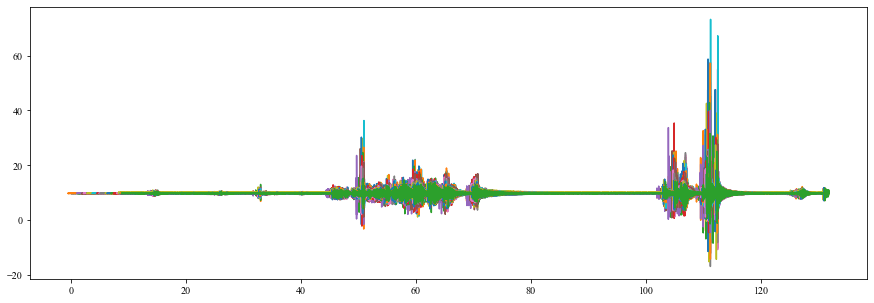

In [18]:
fig,ax = plt.subplots(figsize=(15,5))
C = np.zeros()
for i in range(1,34):
    for j in range(1,34):
        C[i,j] = 
        
    ax.plot(data[key][num]['t']+data['time'][num]['dt'],data[key][num]['az'])